In [23]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

In [24]:
data = pd.read_csv('E:/merged_data.csv')
df = data
X = []
Y = []
window_size = 100
for i in range(1, len(df) - window_size - 1, 1):
    first_feature = df.iloc[i, 1]
    second_feature = df.iloc[i, 2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append([(df.iloc[i + j, 1] - first_feature) / first_feature, (df.iloc[i + j, 2] - second_feature) / second_feature])
    temp2.append((df.iloc[i + window_size, 1] - first_feature) / first_feature)
    X.append(np.array(temp).reshape(100, 2))
    Y.append(np.array(temp2).reshape(1, 1))

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0], 1, 100, 2)
test_X = test_X.reshape(test_X.shape[0], 1, 100, 2)

model = tf.keras.Sequential()

In [26]:
# CNN layers
model.add(TimeDistributed(Conv1D(64, kernel_size=5, activation='relu', input_shape=(None, 100, 2))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=5, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=5, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))

In [27]:
# LSTM layers
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.3))

In [28]:
# Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

In [29]:
history = model.fit(train_X, train_Y, validation_data=(test_X, test_Y), epochs=100, batch_size=128, verbose=1, shuffle=True)
history_dict = history.history
train_loss = history_dict['loss']
train_msle = history_dict['mse']

model.evaluate(test_X, test_Y)

Epoch 1/100
5/5 [==============================] - 40s 2s/step - loss: 1.1235 - mse: 1.1235 - mae: 0.6564 - val_loss: 0.5426 - val_mse: 0.5426 - val_mae: 0.5355
Epoch 2/100
5/5 [==============================] - 0s 58ms/step - loss: 0.5088 - mse: 0.5088 - mae: 0.5212 - val_loss: 0.2798 - val_mse: 0.2798 - val_mae: 0.3624
Epoch 3/100
5/5 [==============================] - 0s 79ms/step - loss: 0.2846 - mse: 0.2846 - mae: 0.3740 - val_loss: 0.2326 - val_mse: 0.2326 - val_mae: 0.3438
Epoch 4/100
5/5 [==============================] - 0s 59ms/step - loss: 0.2100 - mse: 0.2100 - mae: 0.3051 - val_loss: 0.1837 - val_mse: 0.1837 - val_mae: 0.2988
Epoch 5/100
5/5 [==============================] - 0s 57ms/step - loss: 0.1609 - mse: 0.1609 - mae: 0.2860 - val_loss: 0.0972 - val_mse: 0.0972 - val_mae: 0.2349
Epoch 6/100
5/5 [==============================] - 1s 197ms/step - loss: 0.0866 - mse: 0.0866 - mae: 0.2049 - val_loss: 0.0792 - val_mse: 0.0792 - val_mae: 0.2023
Epoch 7/100
5/5 [===========

5/5 [==============================] - 0s 59ms/step - loss: 0.0232 - mse: 0.0232 - mae: 0.0956 - val_loss: 0.0154 - val_mse: 0.0154 - val_mae: 0.0852
Epoch 52/100
5/5 [==============================] - 0s 55ms/step - loss: 0.0229 - mse: 0.0229 - mae: 0.0951 - val_loss: 0.0164 - val_mse: 0.0164 - val_mae: 0.0928
Epoch 53/100
5/5 [==============================] - 0s 54ms/step - loss: 0.0193 - mse: 0.0193 - mae: 0.0912 - val_loss: 0.0139 - val_mse: 0.0139 - val_mae: 0.0847
Epoch 54/100
5/5 [==============================] - 0s 62ms/step - loss: 0.0253 - mse: 0.0253 - mae: 0.0979 - val_loss: 0.0175 - val_mse: 0.0175 - val_mae: 0.0890
Epoch 55/100
5/5 [==============================] - 0s 59ms/step - loss: 0.0256 - mse: 0.0256 - mae: 0.1051 - val_loss: 0.0148 - val_mse: 0.0148 - val_mae: 0.0926
Epoch 56/100
5/5 [==============================] - 0s 53ms/step - loss: 0.0225 - mse: 0.0225 - mae: 0.1029 - val_loss: 0.0152 - val_mse: 0.0152 - val_mae: 0.0840
Epoch 57/100
5/5 [=================

5/5 [==============================] - 0s 8ms/step - loss: 0.0109 - mse: 0.0109 - mae: 0.0708


[0.010874099098145962, 0.010874099098145962, 0.07076838612556458]

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

# Calculate MAE, RMSE, and R^2
mae = mean_absolute_error(test_Y.reshape(-1, 1), yhat_probs)
print('Mean Absolute Error (MAE): %f' % mae)

rmse = np.sqrt(mean_squared_error(test_Y.reshape(-1, 1), yhat_probs))
print('Root Mean Squared Error (RMSE): %f' % rmse)

r2 = r2_score(test_Y.reshape(-1, 1), yhat_probs)
print('R2 Score: %f' % r2)

Mean Absolute Error (MAE): 0.070768
Root Mean Squared Error (RMSE): 0.104279
R2 Score: 0.989071


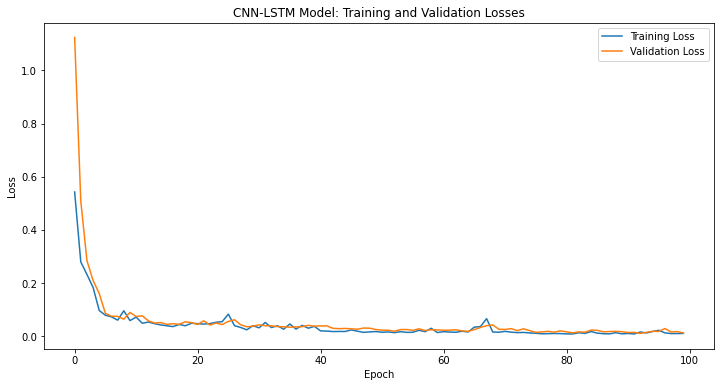

In [31]:
# Plotting the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['val_loss'], label='Training Loss')
plt.plot(history.history['loss'], label='Validation Loss')
plt.title('CNN-LSTM Model: Training and Validation Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [21]:
# Predict the values using the trained model
predictions = model.predict(test_X)

# Reverse the normalization process
def denormalize(value, first_value):
    return value * first_value + first_value

denormalized_predictions = np.empty_like(predictions)
denormalized_test_Y = np.empty_like(test_Y)

# Apply denormalization
for i in range(len(predictions)):
    first_value = df.iloc[i + window_size, 1]
    denormalized_predictions[i] = denormalize(predictions[i], first_value)
    denormalized_test_Y[i] = denormalize(test_Y[i], first_value)

# Compare denormalized predictions with actual values
for i in range(len(denormalized_predictions)):
    print(f"Prediction: {denormalized_predictions[i][0].item():.2f} | Actual: {denormalized_test_Y[i][0].item():.2f}")

5/5 [==============================] - 0s 11ms/step
Prediction: 5418.34 | Actual: 4797.09
Prediction: 7818.08 | Actual: 8005.77
Prediction: 6918.06 | Actual: 5660.46
Prediction: 17317.24 | Actual: 17491.52
Prediction: 13909.65 | Actual: 14316.17
Prediction: 13955.17 | Actual: 14035.62
Prediction: 7282.85 | Actual: 7227.86
Prediction: 16625.27 | Actual: 16488.94
Prediction: 14773.77 | Actual: 13910.74
Prediction: 33797.70 | Actual: 34131.78
Prediction: 6365.70 | Actual: 6202.98
Prediction: 18084.03 | Actual: 19087.91
Prediction: 17125.30 | Actual: 15094.41
Prediction: 18332.60 | Actual: 19819.32
Prediction: 8434.05 | Actual: 8077.90
Prediction: 7161.74 | Actual: 7663.74
Prediction: 5600.33 | Actual: 5407.73
Prediction: 7951.74 | Actual: 7747.14
Prediction: 16083.98 | Actual: 16578.28
Prediction: 18601.59 | Actual: 18306.38
Prediction: 17094.55 | Actual: 16803.64
Prediction: 12835.89 | Actual: 12613.81
Prediction: 26024.51 | Actual: 26242.10
Prediction: 6335.97 | Actual: 5439.01
Predicti

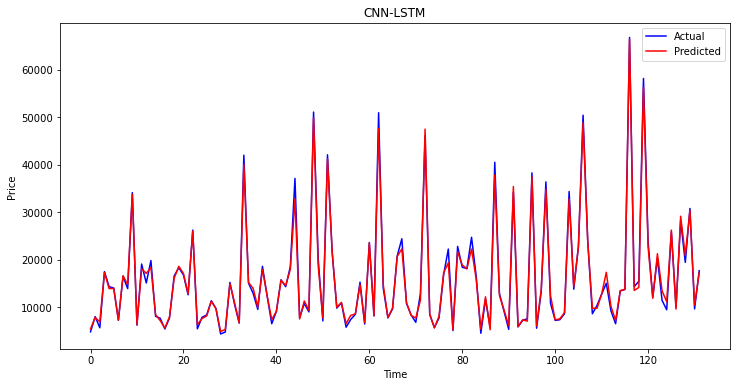

<Figure size 432x288 with 0 Axes>

In [32]:
# Flatten the denormalized_test_Y and denormalized_predictions arrays
denormalized_test_Y_flattened = denormalized_test_Y.flatten()
denormalized_predictions_flattened = denormalized_predictions.flatten()

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(denormalized_test_Y_flattened, label='Actual', color='blue')
plt.plot(denormalized_predictions_flattened, label='Predicted', color='red')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.title('CNN-LSTM')
plt.show()
# Save the plot as an image file
plt.savefig('actual_vs_predicted.png', dpi=300, bbox_inches='tight')